In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [22]:
df = pd.read_csv("D:\Heart Disease Project\heart+disease\processed.cleveland.data", header=None)
df.columns = [
    'Age',        # Age in years
    'Sex',        # Sex (1 = male, 0 = female)
    'cp',         # Chest pain type (1–4)
    'trestbps',   # Resting blood pressure (mm Hg)
    'chol',       # Serum cholesterol (mg/dl)
    'fbs',        # Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
    'restecg',    # Resting electrocardiographic results (0–2)
    'thalach',    # Maximum heart rate achieved
    'exang',      # Exercise induced angina (1 = yes; 0 = no)
    'oldpeak',    # ST depression induced by exercise relative to rest
    'slope',      # Slope of the peak exercise ST segment
    'ca',         # Number of major vessels (0–3) colored by fluoroscopy
    'thal',       # Thalassemia (3 = normal; 6 = fixed defect; 7 = reversible defect)
    'target'      # Heart disease (0 = no disease, 1–4 = presence)
]
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [52]:
df = df.replace('?', np.nan)
df = df.dropna()
df = df.astype(float)
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1.0
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1.0
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2.0
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       297 non-null    float64
 1   Sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    float64
dtypes: float64(14)
memory usage: 34.8 KB


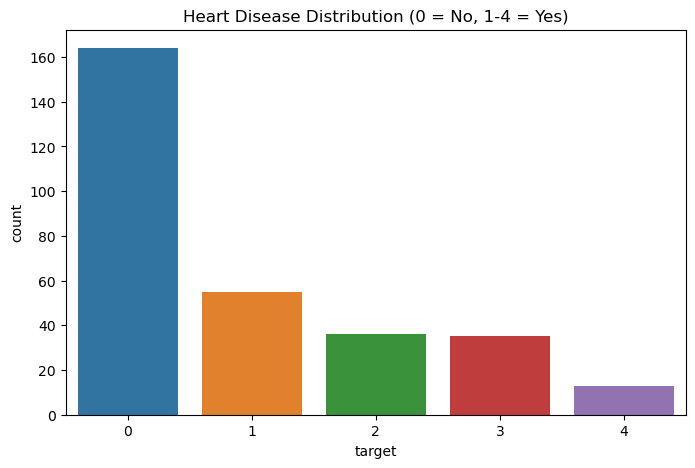

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(x='target', data=df)
plt.title("Heart Disease Distribution (0 = No, 1-4 = Yes)") # Chances of heart disease 1-4, No chances of heart disease 0
plt.show()

In [54]:
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6166666666666667


In [70]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[34  1  0  1  0]
 [ 5  1  0  2  1]
 [ 2  1  1  1  0]
 [ 1  2  1  1  2]
 [ 1  1  0  1  0]]


In [72]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        36
         1.0       0.17      0.11      0.13         9
         2.0       0.50      0.20      0.29         5
         3.0       0.17      0.14      0.15         7
         4.0       0.00      0.00      0.00         3

    accuracy                           0.62        60
   macro avg       0.32      0.28      0.29        60
weighted avg       0.56      0.62      0.58        60

